Sample Data Preview:
    Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       

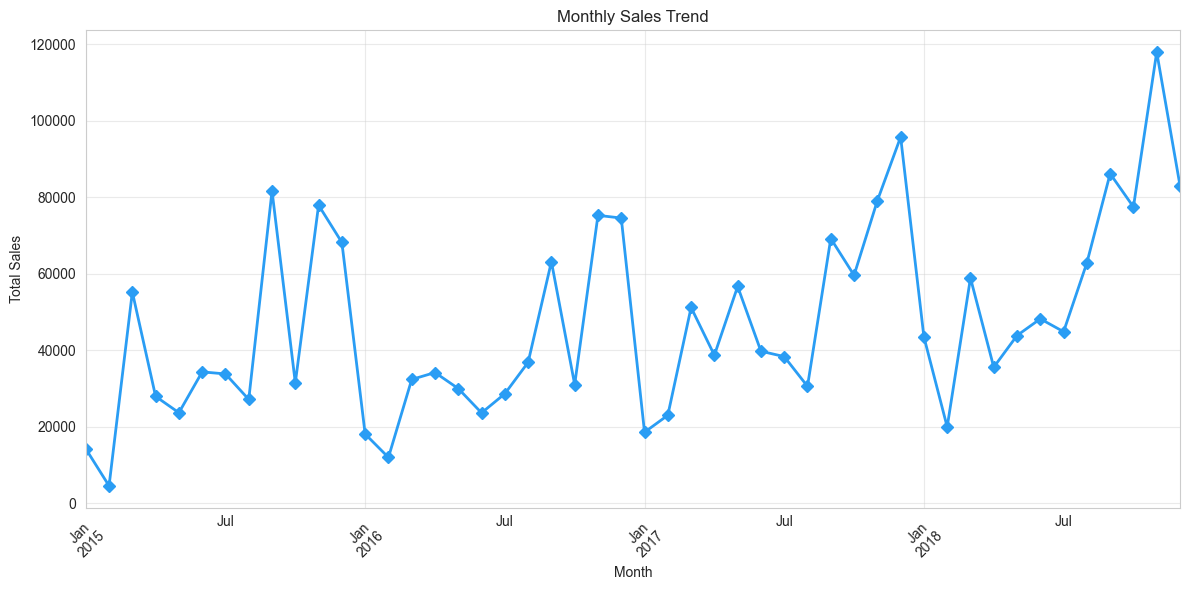

C:\Users\dell\AppData\Local\Temp\ipykernel_16776\3782614882.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


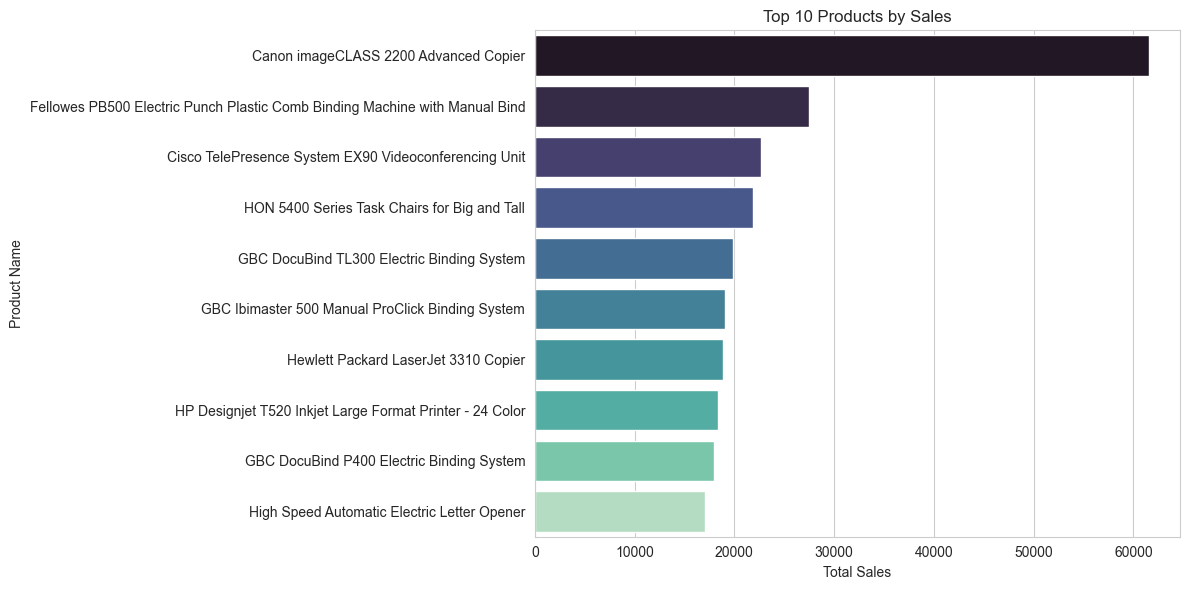

C:\Users\dell\AppData\Local\Temp\ipykernel_16776\3782614882.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


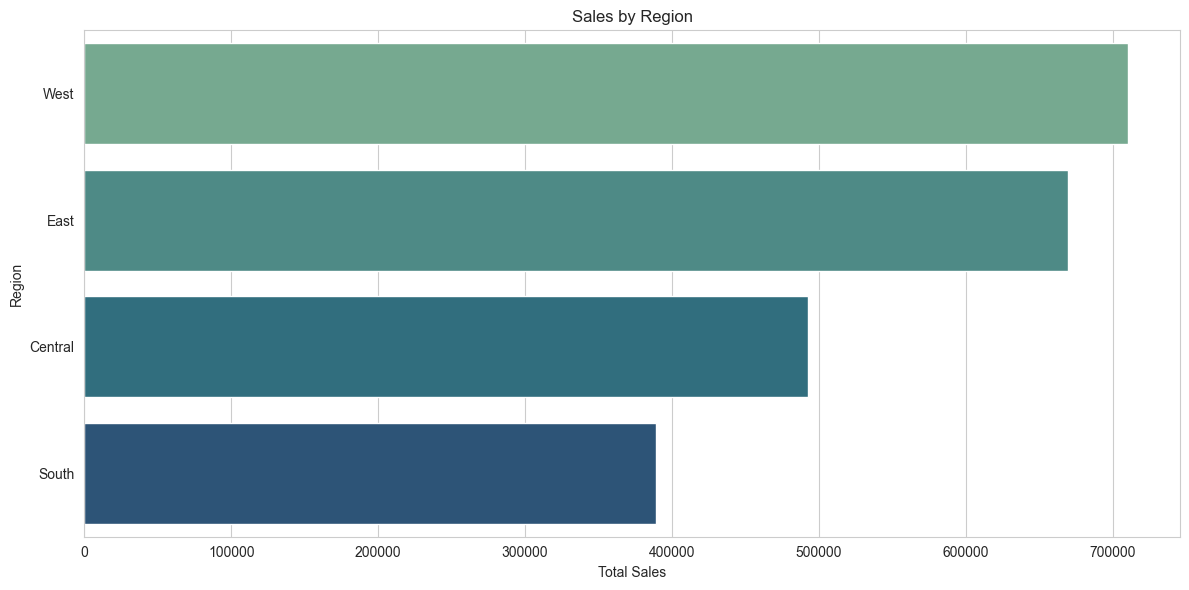

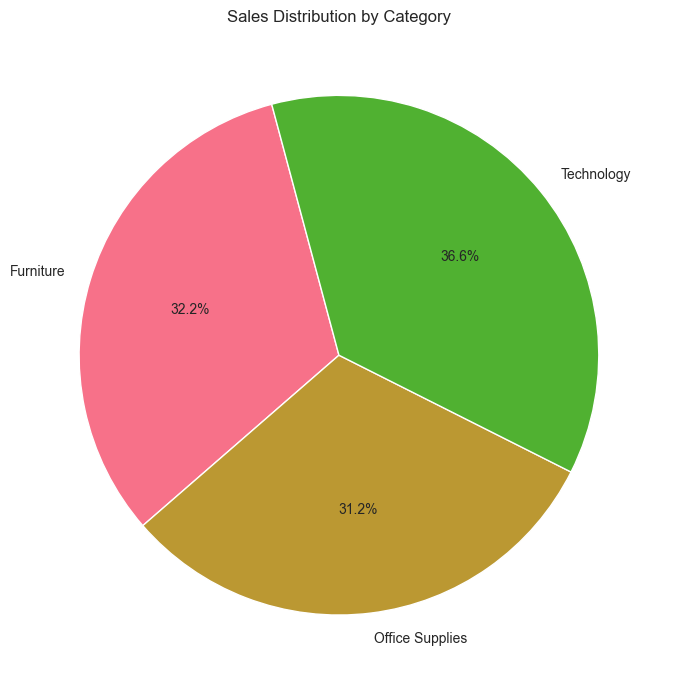

Total Revenue: ₹2,261,536.78
Average Transaction: ₹230.77
Highest Selling Product: Canon imageCLASS 2200 Advanced Copier


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Visualization Settings ----
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ---- Data Loading and Overview ----
file_path = "superstore_final_dataset.csv"
df = pd.read_csv(file_path, encoding='latin-1')

print("Sample Data Preview:\n", df.head())
print("\nData Info:")
df.info()
print("\nMissing Values by Column:\n", df.isnull().sum())

# ---- Date Parsing and Feature Engineering ----
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['OrderMonth'] = df['Order_Date'].dt.to_period('M')

# ---- Monthly Sales Trend ----
monthly_sales = df.groupby('OrderMonth')['Sales'].sum()

plt.figure()
monthly_sales.plot(
    kind='line', marker='D', linewidth=2, color='#2a9df4'
)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(alpha=0.4)
plt.show()

# ---- Top 10 Products by Sales ----
product_sales = df.groupby('Product_Name')['Sales'].sum()
top_10_products = product_sales.nlargest(10)

plt.figure()
sns.barplot(
    y=top_10_products.index, x=top_10_products.values,
    palette='mako'
)
plt.title("Top 10 Products by Sales")
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# ---- Regional Sales Breakdown ----
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(
    x=region_sales.values, y=region_sales.index,
    palette='crest'
)
plt.title("Sales by Region")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# ---- Category Sales Share ----
cat_sales_share = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(7,7))
cat_sales_share.plot(
    kind='pie', autopct='%1.1f%%',
    startangle=105, colors=sns.color_palette('husl')
)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

# ---- Key Sales Metrics ----
total_sales = df['Sales'].sum()
average_sale = df['Sales'].mean()
top_product = product_sales.idxmax()

print(f"Total Revenue: ₹{total_sales:,.2f}")
print(f"Average Transaction: ₹{average_sale:,.2f}")
print(f"Highest Selling Product: {top_product}")
